In [66]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score
import pandas as pd
df_model=pd.read_csv(r'Datos\Casos\data_tf.csv')
df_model.tail()

,municerca,year_week,distancia_grande_m,distancia_rio,distancia_verde_m,edad_diagnostico,sexo,casos,longitude,latitude,...,casos_sum_4w,Periodo,Vecinos_total_x,Vecinos_total_y,casos_lag_1,casos_lag_2,casos_lag_3,casos_lag_4,casos_ma_4,mes
659,ZONA CENTRAL,2025-W27,3651.416292,687.88026,143.737644,41.267399,0.422143,8.0,-63.245953,-32.415279,...,24.0,2025-07,36.0,1.330082,8.0,8.0,8.0,0.0,6.0,6
660,ZONA CENTRAL,2025-W28,3651.416292,687.88026,143.737644,41.267399,0.422143,8.0,-63.245953,-32.415279,...,32.0,2025-07,54.0,1.995123,8.0,8.0,8.0,8.0,8.0,7
661,ZONA CENTRAL,2025-W29,3651.416292,687.88026,143.737644,41.267399,0.422143,8.0,-63.245953,-32.415279,...,32.0,2025-07,54.0,1.995123,8.0,8.0,8.0,8.0,8.0,7
662,ZONA CENTRAL,2025-W30,3651.416292,687.88026,143.737644,41.267399,0.422143,8.0,-63.245953,-32.415279,...,32.0,2025-07,54.0,1.995123,8.0,8.0,8.0,8.0,8.0,7
663,ZONA CENTRAL,2025-W31,3651.416292,687.88026,143.737644,41.267399,0.422143,8.0,-63.245953,-32.415279,...,32.0,2025-08,54.0,1.995123,8.0,8.0,8.0,8.0,8.0,7


In [55]:
# i=0
# for c in df_model['year_week']:
#     df_model["year_week"]=df_model["year_week"].str.replace("c",str(i))
#     i+=1

# features=list(df_model.columns)


# features.remove("casos")

# df_model=df_model.drop(["municerca","year_week","Periodo"],axis=1)
# df_model.reset_index(names="week")
# --- 1) Prepara X, y como np.arrays ---
# X = df_model[features].values
# y = df_model['casos'].values




# # --- 2) Normaliza ---
# scaler = StandardScaler().fit(X)
# Xs = scaler.transform(X)

# # --- 3) Setup CV y métricas ---
# tscv = TimeSeriesSplit(n_splits=5)
# rmse_scores = []
# r2_scores = []
# for train_idx, test_idx in tscv.split(Xs):
#     X_train, X_test = Xs[train_idx], Xs[test_idx]
#     y_train, y_test = y[train_idx], y[test_idx]

#     # --- 4) Construye la red ---
#     model = Sequential([
#         Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#         Dropout(0.2),
#         Dense(32, activation='relu'),
#         Dropout(0.2),
#         Dense(1, activation='linear')
#     ])
#     model.compile(optimizer='adam', loss='mse')

#     # --- 5) Entrena con early stopping ---
#     es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#     model.fit(
#         X_train, y_train,
#         validation_data=(X_test, y_test),
#         epochs=200,
#         batch_size=32,
#         callbacks=[es],
#         verbose=0
#     )

#     # --- 6) Evalúa y almacena RMSE ---
#     y_pred = model.predict(X_test).ravel()
#     rmse = np.sqrt(np.mean((y_test - y_pred)**2))
#     rmse_scores.append(rmse)
#     r2 = r2_score(y_test, y_pred)
#     r2_scores.append(r2)

# print("MLP RMSE CV:", np.round(rmse_scores,2), "→ media:", np.round(np.mean(rmse_scores),2))


In [56]:
print("MLP R²   CV:", np.round(r2_scores, 2), "→ media:", np.round(np.mean(r2_scores), 2))




MLP R²   CV: [0.35] → media: 0.35


In [57]:
# Lista de features: lags, clima, densidad, acccesos, CALMAT, educación, demografía, población, superficie, proximidades…

encuesta = [

    'CALMAT I','CALMAT II','CALMAT III','CALMAT IV','CALMAT V',
    'Acceso a Cloacas','Acceso a Gas de Red','Acceso a Agua de Red','Acceso a Electricidad',
      # y/o otras
    
]

geografia=[    'Superficie (Km cuadrados)',
    'Proximidad al río (m) (distancia mínima)', 'Proximidad al río (m) (distancia al centroide)',
    'Proximidad al río (m) (distancia máxima)',"NVDI"]

poblacion=['Estimación poblacional','Densidad poblacional']
demo = [  'Personas de 0 a 6 años',  'Mujeres de 0 a 6 años','Personas de 7 a 14 años','Personas de 15 a 24 años',
    'Personas de 25 a 59 años','Personas de 60 años o más' ,'Mujeres de 15 a 24 años', 
'Mujeres de 25 a 59 años', 'Mujeres de 60 años o más', 'Mujeres de 7 a 14 años','Varones de 0 a 6 años', 'Varones de 15 a 24 años', 'Varones de 25 a 59 años', 'Varones de 60 años o más', 
'Varones de 7 a 14 años','Mujeres (%)','Varones (%)',]
pobreza=['Hogares Indigentes', 'Hogares Pobres', 'Hogares Pobres No Indigentes','Personas Indigentes', 'Personas Pobres', 'Personas Pobres No Indigentes', 
]

educacion=[ 'UNEA: Primario Completo', 
'UNEA: Primario Incompleto', 'UNEA: Secundario Incompleto', 'UNEA: Sin Instrucción', 'UNEA: Superior y/o Universitario Incompleto',
'UNEA: Secundario Completo','UNEA: Superior y/o Universitario Completo',]

clima = ['t2m','d2m','tp']
acum=["casos_sum_2w","casos_sum_3w","casos_sum_4w"]
lags = [f'casos_lag_{l}' for l in [1,2,3,4]]
por_caso=['sexo','edad_diagnostico','distancia_grande_m', 'distancia_rio', 'distancia_verde_m', ]


#, 'latitude', 'longitude',

vecinos = [
    'Vecinos_total_x','Vecinos_total_y'
]

static=encuesta+demo+pobreza+educacion+poblacion+educacion

estaticas=encuesta+demo+pobreza+educacion
features =['casos_ma_4','mes'] + clima +acum+lags + vecinos+poblacion+geografia#+por_caso#+educacion#+estaticas

In [64]:
# df_model.loc[df_model["year_week"]]
df_model["year_week"].unique()

array(['2024-W01', '2024-W02', '2024-W03', '2024-W04', '2024-W05',
       '2024-W06', '2024-W07', '2024-W08', '2024-W09', '2024-W10',
       '2024-W11', '2024-W12', '2024-W13', '2024-W14', '2024-W15',
       '2024-W16', '2024-W17', '2024-W18', '2024-W19', '2024-W20',
       '2024-W21', '2024-W22', '2024-W23', '2024-W24', '2024-W25',
       '2024-W26', '2024-W27', '2024-W28', '2024-W29', '2024-W30',
       '2024-W31', '2024-W32', '2024-W33', '2024-W34', '2024-W35',
       '2024-W36', '2024-W37', '2024-W38', '2024-W39', '2024-W40',
       '2024-W41', '2024-W42', '2024-W43', '2024-W44', '2024-W45',
       '2024-W46', '2024-W47', '2024-W48', '2024-W49', '2024-W50',
       '2024-W51', '2024-W52', '2025-W01', '2025-W02', '2025-W03',
       '2025-W04', '2025-W05', '2025-W06', '2025-W07', '2025-W08',
       '2025-W09', '2025-W10', '2025-W11', '2025-W12', '2025-W13',
       '2025-W14', '2025-W15', '2025-W16', '2025-W17', '2025-W18',
       '2025-W19', '2025-W20', '2025-W21', '2025-W22', '2025-W

In [58]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Asegurate de que esté ordenado correctamente
df_model = df_model.sort_values(['municerca', 'year_week'])

# Variables a usar como input del LSTM (todas menos 'casos')
feature_cols = [
    'distancia_grande_m', 'distancia_rio', 'distancia_verde_m', 'edad_diagnostico',
    'sexo', 'longitude', 'latitude', 'NVDI', 'Vecinos_total_x', 'Vecinos_total_y',
    'casos_lag_1', 'casos_lag_2', 'casos_lag_3', 'casos_lag_4', 'casos_ma_4', 'mes'
]


vars_inutiles=[]
sacar=['casos', 'municerca', 'year_week', 'Periodo']+vars_inutiles

feature_cols = df_model.columns.difference(sacar).tolist()

feature_cols=features
target_col = 'casos'

# Normalizamos features
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_all = []
y_all = []

sequence_length = 4  # mirar 4 semanas previas

# Generamos secuencias por municerca
for zona, df_zona in df_model.groupby('municerca'):
    df_zona = df_zona.reset_index(drop=True)
    
    # Si no hay suficientes semanas, saltar
    if len(df_zona) <= sequence_length:
        continue

    x_scaled = scaler_x.fit_transform(df_zona[feature_cols])
    y_scaled = scaler_y.fit_transform(df_zona[[target_col]])

    for i in range(sequence_length, len(df_zona)):
        X_all.append(x_scaled[i-sequence_length:i])
        y_all.append(y_scaled[i])

X_all = np.array(X_all)
y_all = np.array(y_all)


In [59]:
# División en train/test


from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, shuffle=False)

# LSTM
model = Sequential()
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))  # regularización
# model.add(LSTM(32, return_sequences=True))  # <- importante
# model.add(Dropout(0.2))
model.add(LSTM(32))
# model.add(Dropout(0.2))
model.add(Dense(1))  # salida: predicción de casos


model.compile(loss='mse', optimizer='adam')
history= model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=1)
# model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, callbacks=[early_stop])

Epoch 1/100
29/29 [==============================] - 6s 43ms/step - loss: 0.0229 - val_loss: 0.0239
Epoch 2/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0172 - val_loss: 0.0197
Epoch 3/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0163 - val_loss: 0.0200
Epoch 4/100
29/29 [==============================] - 0s 8ms/step - loss: 0.0156 - val_loss: 0.0175
Epoch 5/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0146 - val_loss: 0.0171
Epoch 6/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0139 - val_loss: 0.0155
Epoch 7/100
29/29 [==============================] - 0s 8ms/step - loss: 0.0124 - val_loss: 0.0142
Epoch 8/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0118 - val_loss: 0.0122
Epoch 9/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0115 - val_loss: 0.0121
Epoch 10/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0113 - val_loss: 0.0109
Epoch 11

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test)

# print("RMSE:", mean_squared_error(y_test_inv, y_pred_inv, squared=False))
print("MAE:", mean_absolute_error(y_test_inv, y_pred_inv))
print("R2:", r2_score(y_test_inv, y_pred_inv))


4/4 [==============================] - 1s 4ms/step
MAE: 2.3504715976885113
R2: 0.9530635404484606


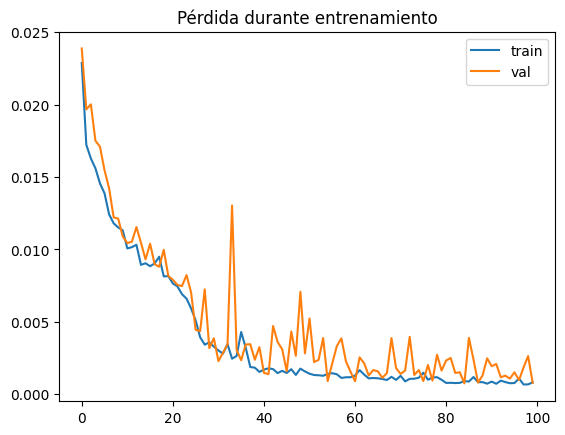

In [61]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Pérdida durante entrenamiento')
plt.legend()
plt.show()